### Загружаем текст и ищем, по какому символу разбить

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

from collections import Counter

In [2]:
db = pd.read_csv("data/daily_app_reviews_appfollow_202203241835.csv")

In [3]:
db.head()

,v_content,platform,v_date
0,Обнаглевшие риелторы при содействии администра...,android,2021-12-12
1,Отвратительный дизайн интерфейсов Много старых...,android,2021-12-12
2,Приложение лагает очень маленькая база по выбо...,android,2021-12-12
3,Надеюсь акции этой компании обвалятся а сама о...,android,2021-12-12
4,Два раза удалили отзыв молодцы так держать Все...,android,2021-12-12


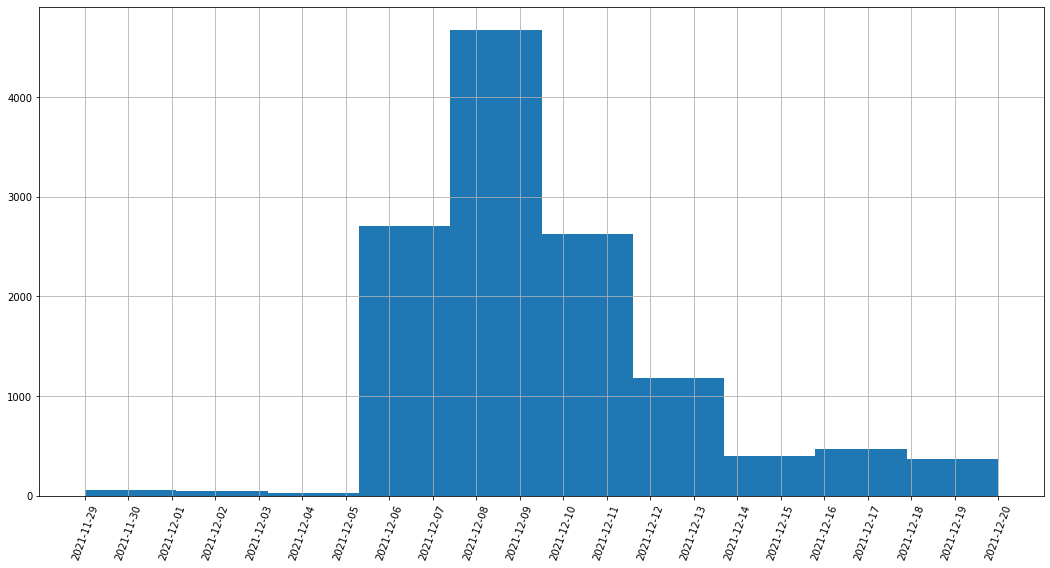

In [4]:
fig, axs = plt.subplots(figsize=(18, 9), nrows=1, ncols=1)

db["v_date"].sort_values().hist()
plt.xticks(rotation=70)
plt.show()

In [5]:
reviews = db[db["v_date"] >= "2021-12-06"]["v_content"].tolist()

In [6]:
reviews[:5]

['Обнаглевшие риелторы при содействии администрация блочат объявления частников Вместо совершенствования оболочки компания тратит силы играя с пользователями в толерастию',
 'Отвратительный дизайн интерфейсов Много старых объявлений Тех поддержка никогда не отвечает Не рекомендую',
 'Приложение лагает очень маленькая база по выбору Другие агрегаторы дают больше выбора',
 'Надеюсь акции этой компании обвалятся а сама она обанкротится Циан проводит очень подлую политику',
 'Два раза удалили отзыв молодцы так держать Всеровно ваш сервис дрянь одни риелторы выходят на связь']

In [7]:
reviews = [x.strip().lower() for x in reviews]

In [8]:
reviews[:5]

['обнаглевшие риелторы при содействии администрация блочат объявления частников вместо совершенствования оболочки компания тратит силы играя с пользователями в толерастию',
 'отвратительный дизайн интерфейсов много старых объявлений тех поддержка никогда не отвечает не рекомендую',
 'приложение лагает очень маленькая база по выбору другие агрегаторы дают больше выбора',
 'надеюсь акции этой компании обвалятся а сама она обанкротится циан проводит очень подлую политику',
 'два раза удалили отзыв молодцы так держать всеровно ваш сервис дрянь одни риелторы выходят на связь']

In [9]:
from collections import defaultdict
import matplotlib.pyplot as plt
import math
import numpy as np

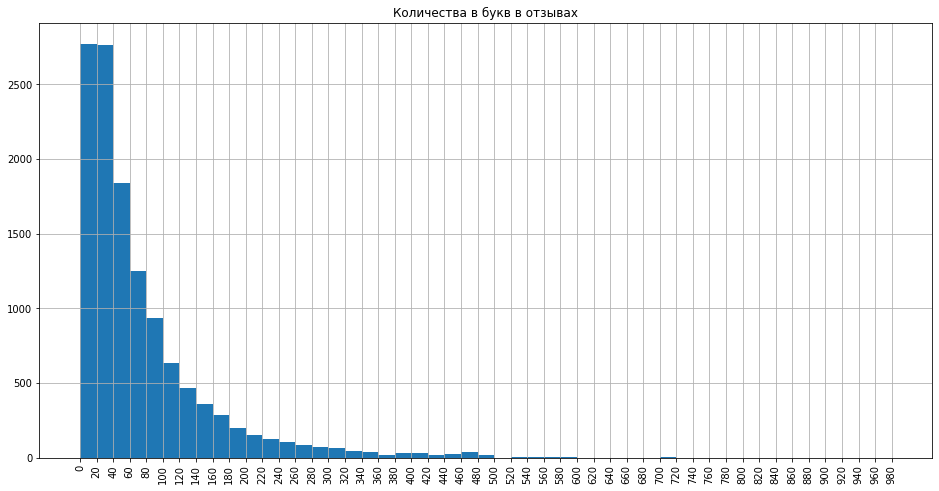

In [10]:
plt.figure(figsize=(16, 8))
plt.hist([len(x) for x in reviews], bins=np.arange(0, 1000, 20), rwidth=1)
plt.grid()
plt.title("Количества в букв в отзывах")
plt.xticks(np.arange(0, 1000, 20), rotation=90)
plt.show()

### Пробуем разбить отзывы на предложения.

In [11]:
import nltk
# nltk.download("punkt")

In [12]:
from nltk.tokenize import sent_tokenize

In [13]:
len_sorted_reviews = sorted(reviews, key=lambda x: len(x), reverse=True)

In [14]:
longest_review = len_sorted_reviews[1]

In [15]:
len_sorted_reviews[-10:]

['фу', 'na', 'na', 'na', 'na', 'из', 'na', 'ня', 'о', '']

In [16]:
longest_review

'скачала приложение только для того чтобы написать отзыв всем ограниченным и малодушным людям оставляющим негативные отзывы в связи с последним обновлением не позволяющим писать только русскимславянам  эти обновления не заставляют вас насильно сдавать ваши в прямом смысле прокуренные грязные квартиры с коврами на стенах и древней мебелью за неадекватные цены комулибо кроме русских это каким узким мышлением надо обладать чтобы воспринимать мир таким образом  к сожалению таким людям ничего в этой жизни уже не поможет и такую свою глупость они будут передавать из поколения в поколение просто желаю имконкретно неадекватным представителям чтобы куда бы они не поехали перед их нацистскими лицами закрывали двери со словами no russians хотя вероятно такие люди кроме как в своих вонючих ипотечных квартирах никуда не ездят не касается всех остальных адекватных русских жаль что такие основополагающие принципы человечности им недоступны и они считают нормой судить человека по национальнойрасовой п

In [17]:
sent_tokenize(longest_review.replace(".", "."))

['скачала приложение только для того чтобы написать отзыв всем ограниченным и малодушным людям оставляющим негативные отзывы в связи с последним обновлением не позволяющим писать только русскимславянам  эти обновления не заставляют вас насильно сдавать ваши в прямом смысле прокуренные грязные квартиры с коврами на стенах и древней мебелью за неадекватные цены комулибо кроме русских это каким узким мышлением надо обладать чтобы воспринимать мир таким образом  к сожалению таким людям ничего в этой жизни уже не поможет и такую свою глупость они будут передавать из поколения в поколение просто желаю имконкретно неадекватным представителям чтобы куда бы они не поехали перед их нацистскими лицами закрывали двери со словами no russians хотя вероятно такие люди кроме как в своих вонючих ипотечных квартирах никуда не ездят не касается всех остальных адекватных русских жаль что такие основополагающие принципы человечности им недоступны и они считают нормой судить человека по национальнойрасовой 

In [18]:
sent_tokenize(longest_review.replace(".", " . "))

['скачала приложение только для того чтобы написать отзыв всем ограниченным и малодушным людям оставляющим негативные отзывы в связи с последним обновлением не позволяющим писать только русскимславянам  эти обновления не заставляют вас насильно сдавать ваши в прямом смысле прокуренные грязные квартиры с коврами на стенах и древней мебелью за неадекватные цены комулибо кроме русских это каким узким мышлением надо обладать чтобы воспринимать мир таким образом  к сожалению таким людям ничего в этой жизни уже не поможет и такую свою глупость они будут передавать из поколения в поколение просто желаю имконкретно неадекватным представителям чтобы куда бы они не поехали перед их нацистскими лицами закрывали двери со словами no russians хотя вероятно такие люди кроме как в своих вонючих ипотечных квартирах никуда не ездят не касается всех остальных адекватных русских жаль что такие основополагающие принципы человечности им недоступны и они считают нормой судить человека по национальнойрасовой 

In [19]:
sentenced_reviews = []

for review in reviews:
    sentenced_reviews += sent_tokenize(review.replace(".", " . "))

In [20]:
def has_alpha(x):
    return len(x) > 0 and max([l.isalpha() for l in x])

In [21]:
len(reviews), len(sentenced_reviews), len([x for x in sentenced_reviews if has_alpha(x)])

(12418, 12417, 12417)

In [22]:
reviews = [x for x in sentenced_reviews if has_alpha(x)]

In [23]:
comma_split_reviews = []

for review in reviews:
    comma_split_reviews += review.split(",")

In [24]:
len(reviews), len(comma_split_reviews)

(12417, 12417)

In [25]:
reviews = [x for x in comma_split_reviews if has_alpha(x) and len(x) >= 5]

In [26]:
len(reviews)

12199

### Токенизируем: с нормализацией и без

In [27]:
from collections import defaultdict
import matplotlib.pyplot as plt
import math
import numpy as np

In [28]:
import string
from nltk.tokenize import WhitespaceTokenizer, WordPunctTokenizer, TreebankWordTokenizer
from nltk.corpus import stopwords

stop_words = stopwords.words('russian')
stop_words.extend([x for x in string.punctuation] + ["«", "»", "это", "!", "!!", "!!!", "??"])
stop_words.remove("только")

In [29]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

def normalize(x):
    return morph.parse(x)[0].normal_form

def extract_POS(x):
    return morph.parse(x)[0].tag.POS or "None"

In [30]:
tokenized_reviews = []
normalized_reviews = []

for r in reviews:
    tokens = [x for x in WordPunctTokenizer().tokenize(r) if x not in stop_words]
    tokens = [x for x in tokens if has_alpha(x)]
    tokenized_reviews.append(tokens)
    normalized_reviews.append([normalize(x) for x in tokens])

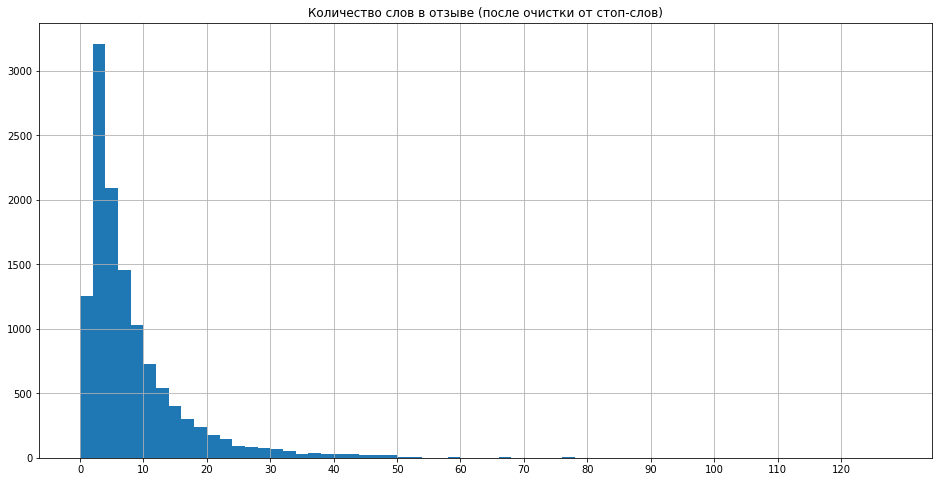

In [31]:
plt.figure(figsize=(16, 8))
plt.hist([len(x) for x in tokenized_reviews], bins=np.arange(0, 130, 2), rwidth=1)
plt.grid()
plt.title("Количество слов в отзыве (после очистки от стоп-слов)")
plt.xticks(np.arange(0, 130, 10))
plt.show()

In [32]:
POS_arr = []
for r in tokenized_reviews:
    POS_arr += [extract_POS(x) for x in r]

In [33]:
pos_counter = Counter(POS_arr)

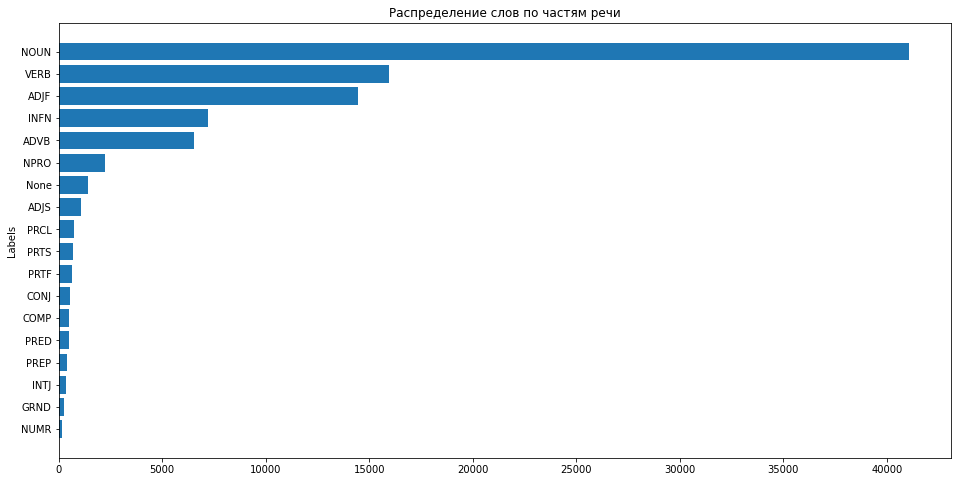

In [34]:
ntop = len(pos_counter)
xs = np.arange(len(pos_counter))
ys = [y for x, y in pos_counter.most_common(ntop)][::-1]
labels = [x for x, y in pos_counter.most_common(ntop)][::-1]

plt.figure(figsize=(16, 8))
plt.title("Распределение слов по частям речи")

plt.barh(xs, ys)
plt.yticks(xs, labels=[x + "" for x in labels])
plt.ylabel("Labels")
plt.show()

Расшифровка тэгов:
https://pymorphy2.readthedocs.io/en/stable/user/grammemes.html#grammeme-docs

### Считаем частоты  n-грамм

In [35]:
def make_n_grams(arr, n, sep=" "):
    return [sep.join(arr[i:i+n]) for i in range(len(arr) - min(len(arr), n) + 1)]

In [36]:
N = 4

In [37]:
n_grams = defaultdict(list)
for tokens in tokenized_reviews:
    for i in range(1, N + 1):
        if len(tokens) >= i:
            n_grams[i] += make_n_grams(tokens, i)

In [38]:
counters = {}
for key, value in n_grams.items():
    counters[key] = Counter(value)

In [39]:
import pandas as pd

In [40]:
data = []
for key in counters.keys():
    for x, y in counters[key].items():
        data.append([key, x, y])
        
db = pd.DataFrame(data=data, columns=["ngram_len", "ngram", "cnt"])

In [41]:
db = db.sort_values(by=["ngram_len", "cnt"], ascending=[True, False], ignore_index=True)

In [42]:
db

,ngram_len,ngram,cnt
0,1,приложение,2660
1,1,сдавать,1624
2,1,кому,1536
3,1,только,1378
4,1,квартиру,1160
...,...,...,...
173464,4,проблему портите репутацию ущемляете,1
173465,4,портите репутацию ущемляете интересы,1
173466,4,репутацию ущемляете интересы граждан,1
173467,4,ущемляете интересы граждан страны,1


In [43]:
db.to_csv("ngrams.csv")

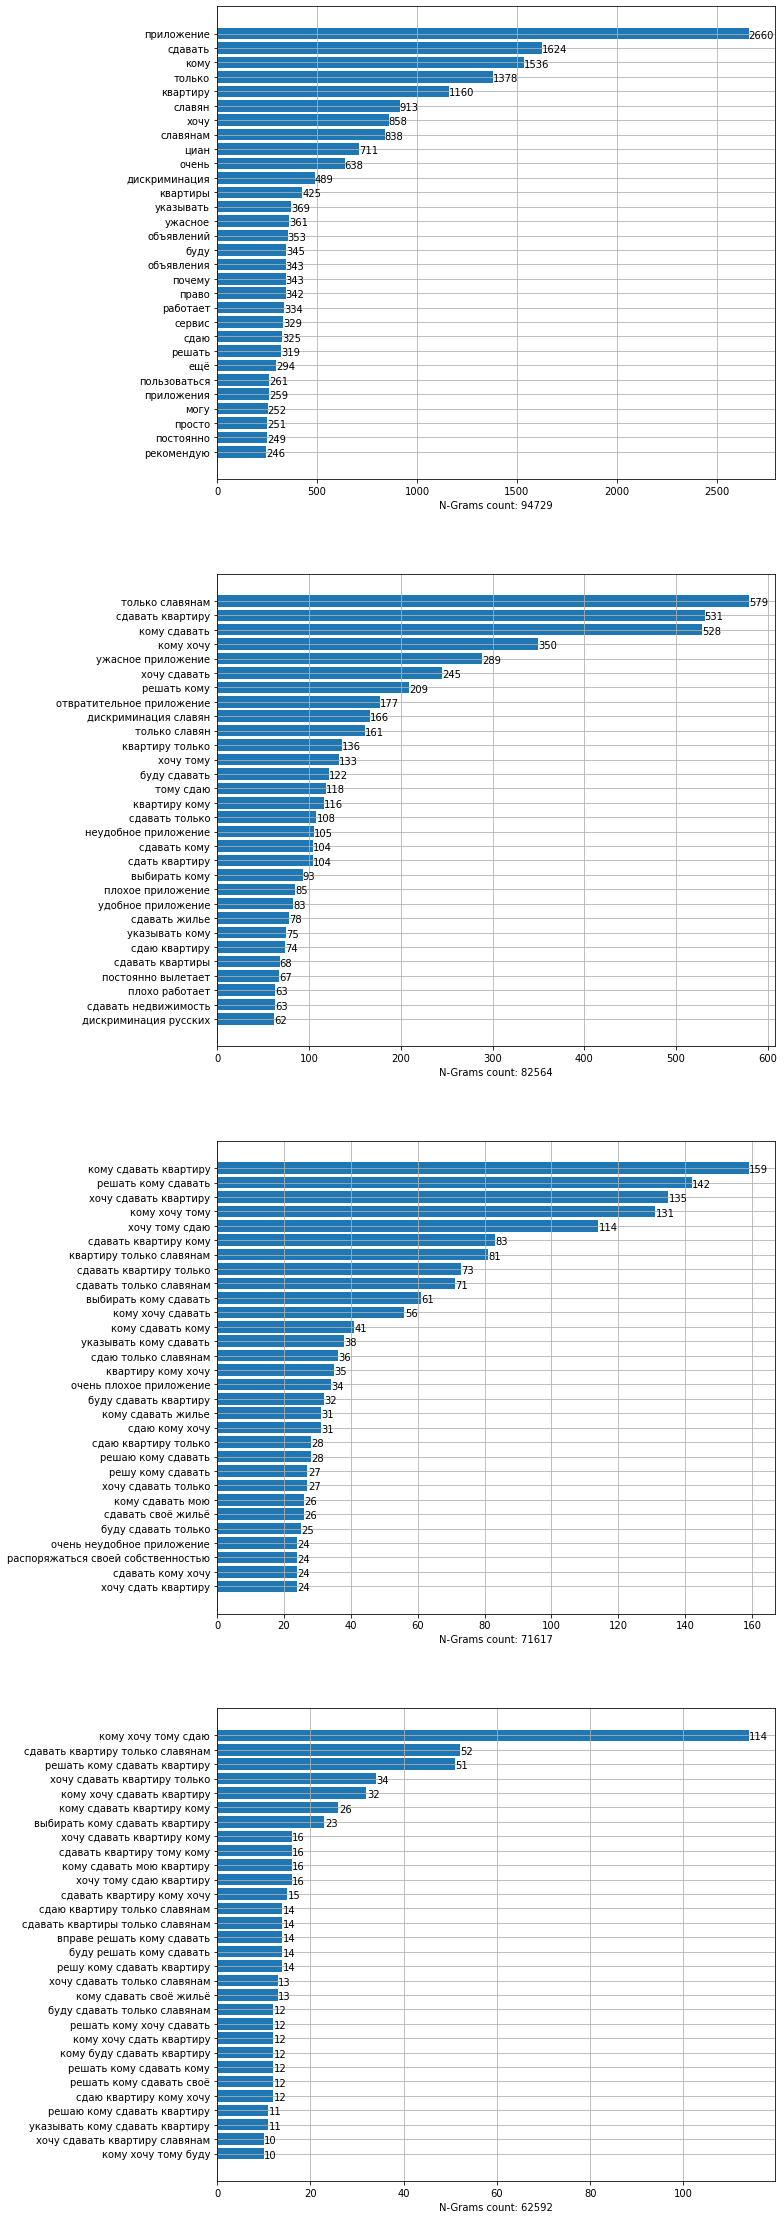

In [44]:
ncols = 1
nrows = math.ceil(N / ncols)
ntop = 30

fig, axs = plt.subplots(figsize=(10 * ncols, 10 * nrows), ncols=ncols, nrows=nrows)

keys = []

for i, key in enumerate(counters.keys()):
    ax = axs.reshape(-1)[i]
    xs = np.arange(ntop)
    ys = [y for x, y in counters[key].most_common(ntop)][::-1]
    labels = [x for x, y in counters[key].most_common(ntop)][::-1]
    ax.grid()
    ax.barh(xs, ys)
    ax.set_yticks(xs)
    ax.set_yticklabels(labels, rotation=0)
    ax.set_xlabel("N-Grams count: {}".format(sum([value for value in counters[key].values()])))
    for x, y in zip(xs, ys):
        ax.annotate(str(y), xy=(y, x), xytext=(y + 0.1, x - 0.3))

plt.show()

### То же самое, но с нормализацией

In [45]:
n_grams = defaultdict(list)
for tokens in normalized_reviews:
    for i in range(1, N + 1):
        if len(tokens) >= i:
            n_grams[i] += make_n_grams(tokens, i)

In [46]:
counters = {}
for key, value in n_grams.items():
    counters[key] = Counter(value)

In [47]:
data = []
for key in counters.keys():
    for x, y in counters[key].items():
        data.append([key, x, y])
        
db = pd.DataFrame(data=data, columns=["ngram_len", "ngram", "cnt"])
db = db.sort_values(by=["ngram_len", "cnt"], ascending=[True, False], ignore_index=True)
db.to_csv("normalized_ngrams.csv")

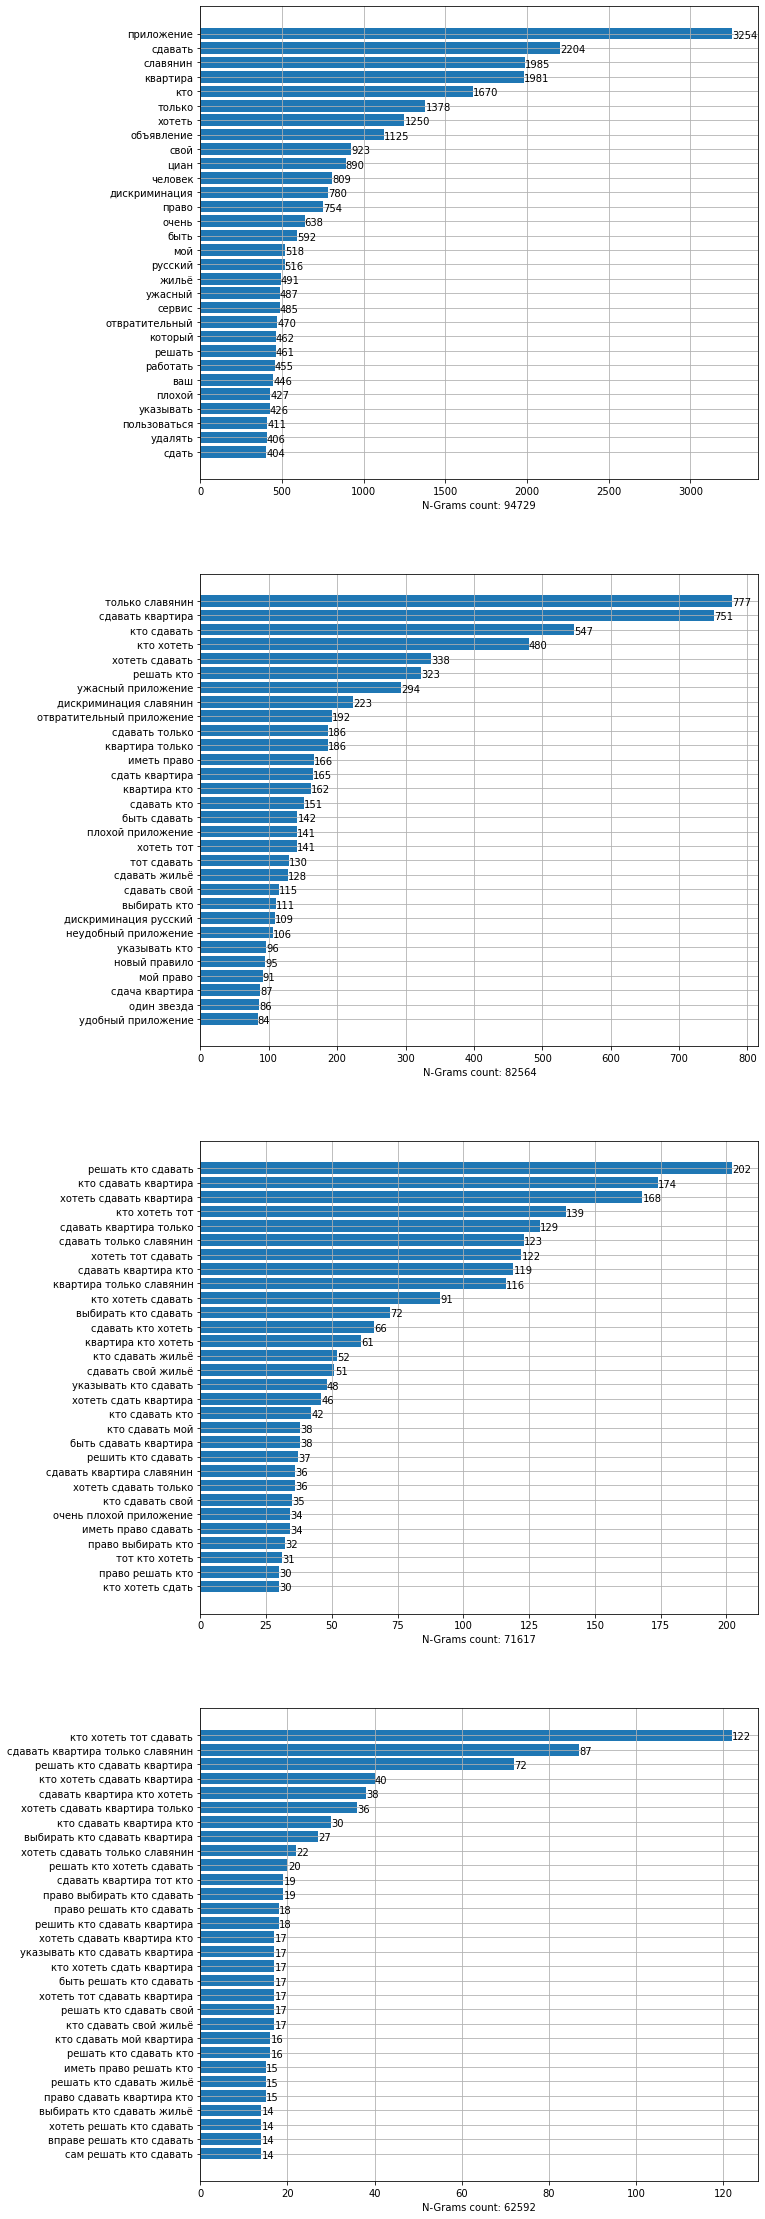

In [48]:
ncols = 1
nrows = math.ceil(N / ncols)
ntop = 30

fig, axs = plt.subplots(figsize=(10 * ncols, 10 * nrows), ncols=ncols, nrows=nrows)

keys = []

for i, key in enumerate(counters.keys()):
    ax = axs.reshape(-1)[i]
    xs = np.arange(ntop)
    ys = [y for x, y in counters[key].most_common(ntop)][::-1]
    labels = [x for x, y in counters[key].most_common(ntop)][::-1]
    ax.grid()
    ax.barh(xs, ys)
    ax.set_yticks(xs)
    ax.set_yticklabels(labels, rotation=0)
    ax.set_xlabel("N-Grams count: {}".format(sum([value for value in counters[key].values()])))
    for x, y in zip(xs, ys):
        ax.annotate(str(y), xy=(y, x), xytext=(y + 0.1, x - 0.3))

plt.show()

## Некоторые примеры

In [49]:
examples = [
    "славянин славянин",
    "дискриминация славянин дискриминация славянин",
]

dct = {x:[] for x in examples}

for i, x in enumerate(normalized_reviews):
    key = " ".join(x)
    if key in examples:
        dct[key].append(reviews[i])
        
for key, value in dct.items():
    print(key)
    for x in value:
        print("\t- " + x)
    print("---")

славянин славянин
	- я славян а славянам нельзя
---
дискриминация славянин дискриминация славянин
---


## Word Embeddings

In [50]:
import gensim.downloader

In [51]:
list(gensim.downloader.info()['models'].keys())

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

In [52]:
word_embeddings = gensim.downloader.load("word2vec-ruscorpora-300")

In [53]:
def review2vec(review, model):
    res = np.zeros(300)
    cnt = 0
    for word in review:
        pos = extract_POS(word)
        key = word + "_" + pos
        if key in model:
            res += model[key]
            cnt += 1
    return res / max(cnt, 1)

In [54]:
w2v_reviews = []
for r in normalized_reviews:
    w2v_reviews.append(review2vec(r, word_embeddings))

In [55]:
w2v_reviews = np.array(w2v_reviews)
w2v_reviews.shape

(12199, 300)

In [56]:
from sklearn.decomposition import PCA

In [57]:
pca = PCA(n_components=2)
pca_words = pca.fit_transform(w2v_reviews)

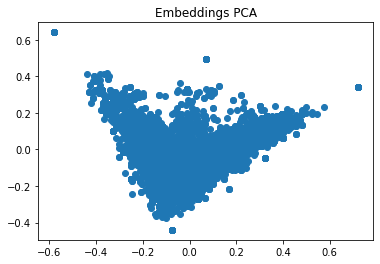

In [58]:
plt.scatter(pca_words[:, 0], pca_words[:, 1])
plt.title("Embeddings PCA")
plt.show()

In [59]:
from sklearn.cluster import DBSCAN, KMeans

In [60]:
eps = 1e-3
min_samples = 10

db = DBSCAN(eps=eps, metric="euclidean", min_samples=min_samples).fit(w2v_reviews)

labels = db.labels_
len(set(labels))

68

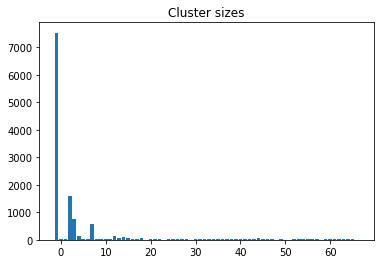

In [61]:
words = np.array(reviews)
normed_words = np.array([" ".join(x) for x in normalized_reviews])

clusters = {}
normed_clusters = {}
sizes = {}
for label in set(labels):
    cluster = words[labels == label]
    normed_cluster = normed_words[labels == label]
    sizes[label] = len(cluster)
    clusters[label] = cluster
    normed_clusters[label] = normed_cluster
    
sizes_list = np.array(sorted([(x, y) for x,y in sizes.items()], key=lambda x: x[1], reverse=True))

plt.title("Cluster sizes")
plt.bar(sizes_list[:, 0], sizes_list[:, 1])
plt.show()

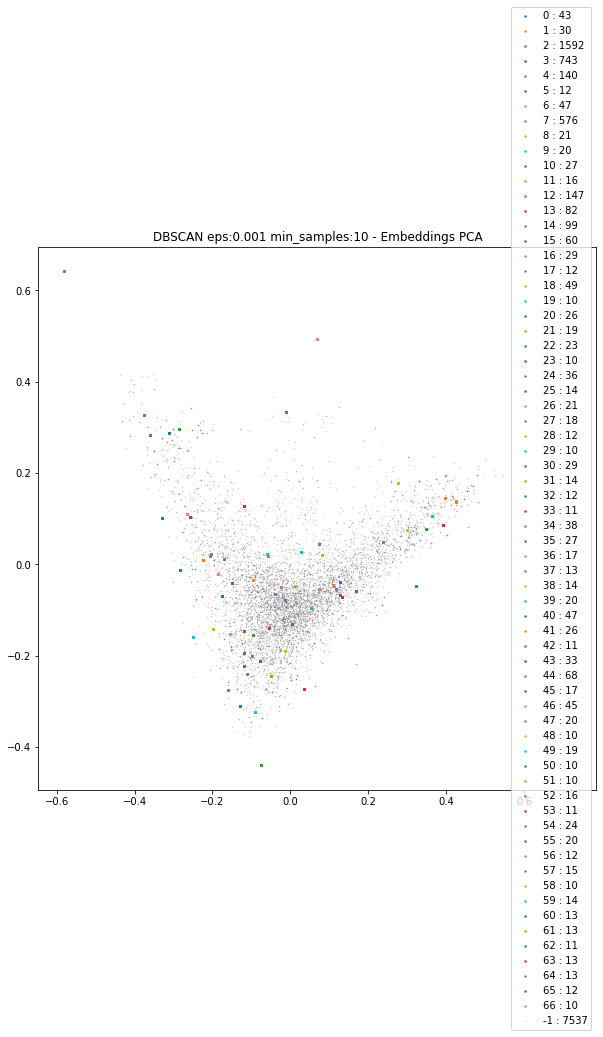

In [62]:
plt.figure(figsize=(10, 10))
for i in set(labels):
    s, a = (2, 1) if i != -1 else (0.1, 0.5)
    label = "{} : {}".format(i, sum(labels == i)) # if i != -1 else ""
    plt.scatter(
        pca_words[labels == i, 0], 
        pca_words[labels == i, 1],
        s=s,
        alpha=a,
        label=label)
plt.legend(loc=5)
plt.title("DBSCAN eps:{} min_samples:{} - Embeddings PCA".format(eps, min_samples))
plt.show()

In [63]:
n_top_clusters_to_plot = 1

sizes_to_plot = sizes_list[n_top_clusters_to_plot:, ]
sizes_to_plot = sizes_to_plot[sizes_to_plot[:, 1] > min_samples]

print("{} clusters cover {} reviews from {}".format(
    sizes_to_plot.shape[0],
    sum(sizes_to_plot[:, 1]),
    words.shape[0]
))

59 clusters cover 4582 reviews from 12199


In [64]:
n_top_clusters_to_plot = 0

sizes_to_plot = sizes_list[n_top_clusters_to_plot:, ]
sizes_to_plot = sizes_to_plot[sizes_to_plot[:, 1] > min_samples]

print("{} clusters cover {} reviews from {}".format(
    sizes_to_plot.shape[0],
    sum(sizes_to_plot[:, 1]),
    words.shape[0]
))

60 clusters cover 12119 reviews from 12199


In [65]:
n_examples = 15

for x in sizes_to_plot:
    print("Label {}, Cluster size: {}".format(x[0], x[1]))
    for review, normed_review in zip(clusters[x[0]][:n_examples], normed_clusters[x[0]][:n_examples]):
        print("\t- " + review) #+ " /\n\t\t (" + normed_review + ")")
    print("\n")

Label -1, Cluster size: 7537
	- обнаглевшие риелторы при содействии администрация блочат объявления частников вместо совершенствования оболочки компания тратит силы играя с пользователями в толерастию
	- отвратительный дизайн интерфейсов много старых объявлений тех поддержка никогда не отвечает не рекомендую
	- приложение лагает очень маленькая база по выбору другие агрегаторы дают больше выбора
	- надеюсь акции этой компании обвалятся а сама она обанкротится циан проводит очень подлую политику
	- два раза удалили отзыв молодцы так держать всеровно ваш сервис дрянь одни риелторы выходят на связь
	- не брат ты мне
	- подменные номера непонятная система отзывов и жалоб на объявления интеграция базы с фнс а теперь  еще и свое виденье того кто что как и кому может и не может снимать все свои объявления и уходить на альтернативные площадки а циан  в свободное эротическое плаванье
	- ужасное приложение как и компания в целом никому не советую
	- очень много не рабочих объявлений висит
	- мол

In [66]:
data = []

for x in sizes_to_plot:
    label = x[0]
    cluster_size = x[1]
    for review, normed_review in zip(clusters[label], normed_clusters[label]):
        data.append([label, cluster_size, review, normed_review])
        
        
db = pd.DataFrame(data=data, columns=["cluster_label", "cluster_size", "review", "normed_review"])
db.to_csv("processed_data/big_sample/later_reviews_clustered_1W.csv")